In [2]:
import pandas as pd

In [14]:
df = pd.read_excel("TOP500_202306.xlsx")

In [15]:
df["runtime"] = ((2/3)*(df["Nmax"]**3)) / (df["Rmax [TFlop/s]"] * 1e12)
df["runtime_min"] = df["runtime"] / 60

# This data may very well be not entirely correct, but it should give us an approximate idea
# For several system we have confirmed the runtime

In [30]:
for max_l in 5, 10:
    count = len(df[df["runtime_min"] <= max_l])
    print(f"{count} systems <= {max_l} min [{count/len(df)*100:.2f}%]")

18 systems <= 5 min [3.60%]
56 systems <= 10 min [11.20%]


In [29]:
df_acc = df[df["Accelerator/Co-Processor"].isna() != True]
print(f"Total {len(df_acc)} accelerator systems")
for max_l in 5, 10:
    count = len(df_acc[df_acc["runtime_min"] <= max_l])
    print(f"{count} systems <= {max_l} min [{count/len(df_acc)*100:.2f}%]")

Total 185 accelerator systems
18 systems <= 5 min [9.73%]
56 systems <= 10 min [30.27%]


(0.0, 100.0)

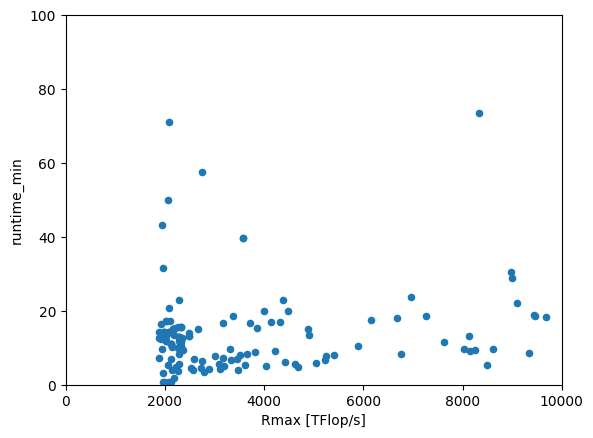

In [34]:
ax = df_acc.plot(y="runtime_min", x="Rmax [TFlop/s]", kind="scatter")
ax.set_xlim(0, 10000)
ax.set_ylim(0, 100)